## Step-1 Import Libraries

In [5]:
pip install alpha-vantage

Note: you may need to restart the kernel to use updated packages.


In [44]:
# import libraries

import numpy as np
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

## Step-2 Load dataset into pandas dataframes 

### 1. confirm_case_df for confirm url
### 2. death_case_df for death url

In [72]:
confirm_case_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_case_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [73]:
confirm_case_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205506,205541,205612,205612,205802,205830,205907,206073,206133,206145
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333305,333316,333322,333330,333330,333338,333343,333360,333381,333391
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271050,271057,271061,271061,271079,271082,271090,271096,271100,271102
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333721,333746,333746,333746,333746,333746


In [74]:
death_case_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7834,7834,7834
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


## 3)	Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

First let's remove all the unnecessary columns from both confirm and death dataframe such as Province/State, Lat, and Long

In [75]:
confirm_case_df.drop(columns=['Province/State','Lat','Long'], inplace=True)
death_case_df.drop(columns=['Province/State','Lat','Long'],inplace=True)

In [76]:
confirm_case_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205506,205541,205612,205612,205802,205830,205907,206073,206133,206145
1,Albania,0,0,0,0,0,0,0,0,0,...,333305,333316,333322,333330,333330,333338,333343,333360,333381,333391
2,Algeria,0,0,0,0,0,0,0,0,0,...,271050,271057,271061,271061,271079,271082,271090,271096,271100,271102
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,333721,333721,333721,333721,333721,333746,333746,333746,333746,333746


In [77]:
death_case_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7834,7834,7834
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,156,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,Zambia,0,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


There might some records for the same coutry having in same dataframe so let's first perform groupby on country/region column and sum up the cases if so.

In [78]:
confirmed_df = confirm_case_df.groupby(['Country/Region']).sum()
death_df = death_case_df.groupby(['Country/Region']).sum()

In [79]:
confirmed_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,205506,205541,205612,205612,205802,205830,205907,206073,206133,206145
Albania,0,0,0,0,0,0,0,0,0,0,...,333305,333316,333322,333330,333330,333338,333343,333360,333381,333391
Algeria,0,0,0,0,0,0,0,0,0,0,...,271050,271057,271061,271061,271079,271082,271090,271096,271100,271102
Andorra,0,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,47219,47219,47219,47219
Angola,0,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [80]:
death_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7834,7834,7834
Albania,0,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,156,157,157,157,157
Angola,0,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


Sum all the cases for the country. For that let's apply sum() on axis=1.

In [81]:
covid_positive = confirmed_df.sum(axis=1).reset_index()
covid_positive.rename(columns={'Country/Region':'Country',0:'Confirmed_cases'},inplace=True)
covid_positive

,Country,Confirmed_cases
0,Afghanistan,110008711
1,Albania,153496700
2,Algeria,156695695
3,Andorra,19962983
4,Angola,49935865
...,...,...
196,West Bank and Gaza,345035344
197,Winter Olympics 2022,163102
198,Yemen,6732715
199,Zambia,163469994


In [82]:
covid_negative = death_df.sum(axis=1).reset_index()
covid_negative.rename(columns={'Country/Region':'Country',0:'Total_death'},inplace=True)
covid_negative

,Country,Total_death
0,Afghanistan,4666030
1,Albania,2140181
2,Algeria,4240699
3,Andorra,111465
4,Angola,1046564
...,...,...
196,West Bank and Gaza,3206741
197,Winter Olympics 2022,0
198,Yemen,1308182
199,Zambia,2244123


Merge the above two saperate dataframes into one

In [83]:
global_level_df = pd.merge(covid_positive,covid_negative,on='Country')

In [84]:
global_level_df

,Country,Confirmed_cases,Total_death
0,Afghanistan,110008711,4666030
1,Albania,153496700,2140181
2,Algeria,156695695,4240699
3,Andorra,19962983,111465
4,Angola,49935865,1046564
...,...,...,...
196,West Bank and Gaza,345035344,3206741
197,Winter Olympics 2022,163102,0
198,Yemen,6732715,1308182
199,Zambia,163469994,2244123



## Step-4 Stock reasearch

In [108]:
k = 'NV1T7B89DEYLSJ4T'
ts = TimeSeries(key=k,output_format='pandas')
american = ts.get_daily_adjusted('NASDX')
canadian = ts.get_daily_adjusted('TSCO.LON')
travel = ts.get_daily_adjusted('AC')
real_estate = ts.get_daily_adjusted('PLD')
precious_metal = ts.get_daily_adjusted('CIGI')

In [109]:
american[0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-12-01,26.01,26.01,26.01,26.01,26.010000,0.0,0.0000,1.0
2022-11-30,25.97,25.97,25.97,25.97,25.970000,0.0,0.7655,1.0
2022-11-29,25.57,25.57,25.57,25.57,24.837906,0.0,0.0000,1.0
2022-11-28,25.75,25.75,25.75,25.75,25.012753,0.0,0.0000,1.0
2022-11-25,26.13,26.13,26.13,26.13,25.381873,0.0,0.0000,1.0
...,...,...,...,...,...,...,...,...
2022-07-19,27.20,27.20,27.20,27.20,26.388848,0.0,0.0000,1.0
2022-07-18,26.38,26.38,26.38,26.38,25.593301,0.0,0.0000,1.0
2022-07-15,26.62,26.62,26.62,26.62,25.826144,0.0,0.0000,1.0


In [110]:
usa_df = pd.DataFrame(american[0])
cnd_df = pd.DataFrame(canadian[0])
travel_df = pd.DataFrame(travel[0])
real_estate_df = pd.DataFrame(real_estate[0])
precious_metal_df = pd.DataFrame(precious_metal[0])

In [111]:
usa_df.reset_index(level=0, inplace=True)
cnd_df.reset_index(level=0, inplace=True)
travel_df.reset_index(level=0, inplace=True)
real_estate_df.reset_index(level=0, inplace=True)
precious_metal_df.reset_index(level=0, inplace=True)

In [112]:
usa_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-01,26.01,26.01,26.01,26.01,26.010000,0.0,0.0000,1.0
1,2022-11-30,25.97,25.97,25.97,25.97,25.970000,0.0,0.7655,1.0
2,2022-11-29,25.57,25.57,25.57,25.57,24.837906,0.0,0.0000,1.0
3,2022-11-28,25.75,25.75,25.75,25.75,25.012753,0.0,0.0000,1.0
4,2022-11-25,26.13,26.13,26.13,26.13,25.381873,0.0,0.0000,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-19,27.20,27.20,27.20,27.20,26.388848,0.0,0.0000,1.0
96,2022-07-18,26.38,26.38,26.38,26.38,25.593301,0.0,0.0000,1.0
97,2022-07-15,26.62,26.62,26.62,26.62,25.826144,0.0,0.0000,1.0
98,2022-07-14,26.14,26.14,26.14,26.14,25.360459,0.0,0.0000,1.0


In [113]:
cnd_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-02,228.2,230.551,226.878,228.5,228.5000,13417739.0,0.0,1.0
1,2022-12-01,229.3,231.600,228.300,228.7,228.7000,15118000.0,0.0,1.0
2,2022-11-30,234.2,234.900,227.000,227.5,227.5000,39639781.0,0.0,1.0
3,2022-11-29,232.4,235.264,232.100,233.0,233.0000,13560580.0,0.0,1.0
4,2022-11-28,234.6,235.300,232.400,232.6,232.6000,18823801.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-20,263.3,263.800,259.391,259.8,254.7775,11754360.0,0.0,1.0
96,2022-07-19,258.9,263.300,258.300,262.3,257.2292,11845680.0,0.0,1.0
97,2022-07-18,260.0,262.500,258.600,260.0,254.9736,10818470.0,0.0,1.0
98,2022-07-15,257.8,260.200,256.400,258.9,253.8949,18031240.0,0.0,1.0


In [114]:
travel_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-02,40.41,41.640,40.41,41.64,41.640000,2395.0,0.0,1.0
1,2022-12-01,38.13,40.450,38.13,40.30,40.300000,3230.0,0.0,1.0
2,2022-11-30,39.45,40.450,38.00,40.45,40.450000,5414.0,0.1,1.0
3,2022-11-29,40.98,40.980,38.60,38.60,38.504809,1748.0,0.0,1.0
4,2022-11-28,41.19,42.000,40.37,40.37,40.270444,1495.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-20,37.15,38.900,37.15,38.90,38.804069,7346.0,0.0,1.0
96,2022-07-19,37.74,37.970,37.69,37.72,37.626979,3592.0,0.0,1.0
97,2022-07-18,37.73,37.918,37.15,37.42,37.327719,3176.0,0.0,1.0
98,2022-07-15,37.66,37.900,37.39,37.90,37.806535,12542.0,0.0,1.0


In [115]:
real_estate_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-02,115.56,118.02,114.82,116.94,116.940000,3014114.0,0.0,1.0
1,2022-12-01,119.05,119.49,115.74,117.10,117.100000,2784289.0,0.0,1.0
2,2022-11-30,113.26,117.82,112.49,117.79,117.790000,8839715.0,0.0,1.0
3,2022-11-29,111.60,114.12,111.26,113.81,113.810000,2635129.0,0.0,1.0
4,2022-11-28,115.56,116.85,110.92,111.46,111.460000,3910665.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-20,125.11,127.43,124.00,124.57,123.762498,3235660.0,0.0,1.0
96,2022-07-19,120.57,125.24,119.90,125.11,124.298997,3884663.0,0.0,1.0
97,2022-07-18,123.37,124.28,119.01,119.20,118.427308,4337308.0,0.0,1.0
98,2022-07-15,120.04,121.51,118.55,121.01,120.225575,2726627.0,0.0,1.0


In [116]:
precious_metal_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-02,95.250,97.83,95.04,96.20,96.20,75777.0,0.0,1.0
1,2022-12-01,94.920,96.95,92.37,96.53,96.53,85762.0,0.0,1.0
2,2022-11-30,91.585,94.68,91.22,94.67,94.67,86327.0,0.0,1.0
3,2022-11-29,92.000,92.65,91.16,91.66,91.66,43569.0,0.0,1.0
4,2022-11-28,94.140,94.17,91.49,91.98,91.98,53522.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-20,119.890,121.21,119.03,120.56,120.56,31837.0,0.0,1.0
96,2022-07-19,118.470,120.93,117.82,119.55,119.55,64394.0,0.0,1.0
97,2022-07-18,115.000,118.70,114.84,117.00,117.00,61075.0,0.0,1.0
98,2022-07-15,109.830,113.18,109.69,112.93,112.93,45483.0,0.0,1.0


## Step-05 Daily high and low prices for the stocks

In [117]:
# FIltering Date, High price, and low price columns and renaming it

usa_df = usa_df[['date','2. high','3. low']].rename(columns={'2. high':'usa_high','3. low':'usa_low'})
cnd_df = cnd_df[['date','2. high','3. low']].rename(columns={'2. high':'cnd_high','3. low':'cnd_low'})
travel_df = travel_df[['date','2. high','3. low']].rename(columns={'2. high':'travel_high','3. low':'travel_low'})
real_estate_df = real_estate_df[['date','2. high','3. low']].rename(columns={'2. high':'real_estate_high','3. low':'real_estate_low'})
precious_metal_df = precious_metal_df[['date','2. high','3. low']].rename(columns={'2. high':'precious_metal_high','3. low':'precious_metal_low'})

In [118]:
print("USA Stock Dataframe")
print(usa_df.head())
print("Canada Stock Dataframe")
print(cnd_df.head())
print("Travel Sector Dataframe")
print(travel_df.head())
print("Real Estate Dataframe")
print(real_estate_df.head())
print("Precious Metal Dataframe")
print(precious_metal_df.head())

USA Stock Dataframe
        date  usa_high  usa_low
0 2022-12-01     26.01    26.01
1 2022-11-30     25.97    25.97
2 2022-11-29     25.57    25.57
3 2022-11-28     25.75    25.75
4 2022-11-25     26.13    26.13
Canada Stock Dataframe
        date  cnd_high  cnd_low
0 2022-12-02   230.551  226.878
1 2022-12-01   231.600  228.300
2 2022-11-30   234.900  227.000
3 2022-11-29   235.264  232.100
4 2022-11-28   235.300  232.400
Travel Sector Dataframe
        date  travel_high  travel_low
0 2022-12-02        41.64       40.41
1 2022-12-01        40.45       38.13
2 2022-11-30        40.45       38.00
3 2022-11-29        40.98       38.60
4 2022-11-28        42.00       40.37
Real Estate Dataframe
        date  real_estate_high  real_estate_low
0 2022-12-02            118.02           114.82
1 2022-12-01            119.49           115.74
2 2022-11-30            117.82           112.49
3 2022-11-29            114.12           111.26
4 2022-11-28            116.85           110.92
Precious Me

## Merging stock dataframes

In [119]:
stock_df = usa_df.merge(cnd_df,on='date').merge(travel_df,on='date').merge(real_estate_df,on='date').merge(precious_metal_df,on='date')
stock_df.head()

,date,usa_high,usa_low,cnd_high,cnd_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metal_high,precious_metal_low
0,2022-12-01,26.01,26.01,231.600,228.3,40.45,38.13,119.49,115.74,96.95,92.37
1,2022-11-30,25.97,25.97,234.900,227.0,40.45,38.00,117.82,112.49,94.68,91.22
2,2022-11-29,25.57,25.57,235.264,232.1,40.98,38.60,114.12,111.26,92.65,91.16
3,2022-11-28,25.75,25.75,235.300,232.4,42.00,40.37,116.85,110.92,94.17,91.49
4,2022-11-25,26.13,26.13,238.800,235.0,40.60,40.60,116.94,115.26,94.98,93.37


## step 6: Append that info to the data frame created in step 3

## Step-07 Visual output

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Ploting Confirm case of USA and CANADA

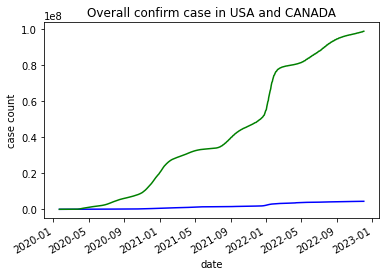

In [ ]:
fig = plt.figure()

plt.plot_date(final_df['date'], final_df['cnd_positive_cases'], 'b-')
plt.plot_date(final_df['date'], final_df['usa_positive_cases'], 'g-')
plt.title('Overall confirm case in USA and CANADA')
plt.xlabel('date')
plt.ylabel('case count')

fig.autofmt_xdate()
plt.show()

### Ploting Death ration of USA and CANADA

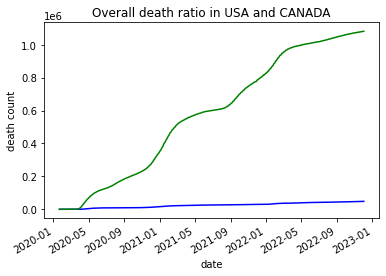

In [ ]:
fig = plt.figure()

plt.plot_date(final_df['date'], final_df['cnd_total_death'], 'b-')
plt.plot_date(final_df['date'], final_df['usa_total_death'], 'g-')
plt.title('Overall death ratio in USA and CANADA')
plt.xlabel('date')
plt.ylabel('death count')

fig.autofmt_xdate()
plt.show()

### USA Stock market analysis

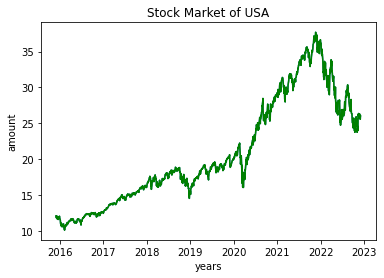

In [ ]:
plt.plot(stock_df['date'],stock_df['usa_low'])
plt.plot(stock_df['date'],stock_df['usa_high'], 'g-')

plt.title('Stock Market of USA')
plt.xlabel('years')
plt.ylabel('amount')
plt.show()

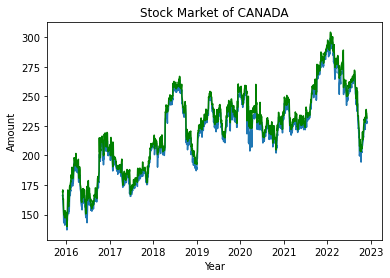

In [ ]:
plt.plot(stock_df["date"], stock_df["cnd_low"])
plt.plot(stock_df["date"], stock_df["cnd_high"],'g-')

plt.title("Stock Market of CANADA")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

* As we can see increasing number of conformed cases and the death has not affected the Stock market of CANADA. As this market shows keep increasing trend till end of the 2023 and then it little declined.

In [ ]:
print(confirm_case_df.head())
print(death_case_df.head())

  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  11/24/22  11/25/22  11/26/22  11/27/22  \
0        0        0        0  ...    205506    205541    205612    205612   
1        0        0        0  ...    333305    333316    333322    333330   
2        0        0        0  ...    271050    271057    271061    271061   
3        0        0        0  ...     46824     46824     46824     46824   
4        0        0        0  ...    104491    104491    104491    104491   

   11/28/22  11/29/22  11/30/22  12/1/22  12/2/22  12/3/22  
0    205802    205830    205907

In [ ]:
confirmed_df1 = confirmed_df.reset_index()
death_df1 = death_df.reset_index()

In [ ]:
confirmed_df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205506,205541,205612,205612,205802,205830,205907,206073,206133,206145
1,Albania,0,0,0,0,0,0,0,0,0,...,333305,333316,333322,333330,333330,333338,333343,333360,333381,333391
2,Algeria,0,0,0,0,0,0,0,0,0,...,271050,271057,271061,271061,271079,271082,271090,271096,271100,271102
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104676,104676,104676,104676


In [ ]:
death_df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7834,7834,7834
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,156,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1924,1924,1924,1924


In [ ]:
cnd_cases = confirmed_df1[confirmed_df1['Country/Region']=='Canada']
usa_cases = confirmed_df1[confirmed_df1['Country/Region']=='US']
positive_cases = pd.concat([cnd_cases,usa_cases],ignore_index=True)
positive_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,Canada,0,2,3,3,3,3,4,4,4,...,4427242,4428546,4428546,4428546,4430558,4431111,4432426,4444843,4444912,4444912
1,US,1,1,2,2,5,5,5,6,6,...,98544542,98566341,98569058,98573468,98633140,98697622,98807782,98924207,98962019,98967906


In [ ]:
positive_cases = positive_cases.transpose().reset_index().rename(columns={'index':'date',0:'cnd_positive_cases',1:'usa_positive_cases'})
positive_cases

,date,cnd_positive_cases,usa_positive_cases
0,Country/Region,Canada,US
1,1/22/20,0,1
2,1/23/20,2,1
3,1/24/20,3,2
4,1/25/20,3,2
...,...,...,...
1043,11/29/22,4431111,98697622
1044,11/30/22,4432426,98807782
1045,12/1/22,4444843,98924207
1046,12/2/22,4444912,98962019


In [ ]:
cnd_cases_death = death_df1[death_df1['Country/Region']=='Canada']
usa_cases_death = death_df1[death_df1['Country/Region']=='US']
negative_cases = pd.concat([cnd_cases_death,usa_cases_death],ignore_index=True)
negative_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22
0,Canada,0,0,0,0,0,0,0,0,0,...,47850,47862,47862,47862,47923,47923,48002,48133,48133,48133
1,US,0,0,0,0,0,0,0,0,0,...,1079154,1079294,1079296,1079296,1079576,1079969,1080536,1081147,1081412,1081431


In [ ]:
negative_cases = negative_cases.transpose().reset_index().rename(columns={'index':'date',0:'cnd_total_death',1:'usa_total_death'})
negative_cases

,date,cnd_total_death,usa_total_death
0,Country/Region,Canada,US
1,1/22/20,0,0
2,1/23/20,0,0
3,1/24/20,0,0
4,1/25/20,0,0
...,...,...,...
1043,11/29/22,47923,1079969
1044,11/30/22,48002,1080536
1045,12/1/22,48133,1081147
1046,12/2/22,48133,1081412


### Merging death and confirmed dataframes to make final dataframe for data visulization 

In [ ]:
final_df = positive_cases.merge(negative_cases,on='date')
final_df

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
0,Country/Region,Canada,US,Canada,US
1,1/22/20,0,1,0,0
2,1/23/20,2,1,0,0
3,1/24/20,3,2,0,0
4,1/25/20,3,2,0,0
...,...,...,...,...,...
1043,11/29/22,4431111,98697622,47923,1079969
1044,11/30/22,4432426,98807782,48002,1080536
1045,12/1/22,4444843,98924207,48133,1081147
1046,12/2/22,4444912,98962019,48133,1081412


In [ ]:
final_df = final_df.iloc[1:,:]
final_df

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
1,1/22/20,0,1,0,0
2,1/23/20,2,1,0,0
3,1/24/20,3,2,0,0
4,1/25/20,3,2,0,0
5,1/26/20,3,5,0,0
...,...,...,...,...,...
1043,11/29/22,4431111,98697622,47923,1079969
1044,11/30/22,4432426,98807782,48002,1080536
1045,12/1/22,4444843,98924207,48133,1081147
1046,12/2/22,4444912,98962019,48133,1081412


In [ ]:
# final_df['date'] = pd.to_datetime(final_df['date'])
final_df['date'] = pd.to_datetime(final_df['date'])
final_df

C:\Users\DARKSIDE\AppData\Local\Temp\ipykernel_17976\3300361000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(final_df['date'])


,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
1,2020-01-22,0,1,0,0
2,2020-01-23,2,1,0,0
3,2020-01-24,3,2,0,0
4,2020-01-25,3,2,0,0
5,2020-01-26,3,5,0,0
...,...,...,...,...,...
1043,2022-11-29,4431111,98697622,47923,1079969
1044,2022-11-30,4432426,98807782,48002,1080536
1045,2022-12-01,4444843,98924207,48133,1081147
1046,2022-12-02,4444912,98962019,48133,1081412


In [ ]:
final_df.head()

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
1,2020-01-22,0,1,0,0
2,2020-01-23,2,1,0,0
3,2020-01-24,3,2,0,0
4,2020-01-25,3,2,0,0
5,2020-01-26,3,5,0,0


In [ ]:
stock_df.head()

,date,usa_high,usa_low,cnd_high,cnd_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metal_high,precious_metal_low
0,2022-12-01,26.01,26.01,231.600,228.3,40.45,38.13,119.49,115.74,96.95,92.37
1,2022-11-30,25.97,25.97,234.900,227.0,40.45,38.00,117.82,112.49,94.68,91.22
2,2022-11-29,25.57,25.57,235.264,232.1,40.98,38.60,114.12,111.26,92.65,91.16
3,2022-11-28,25.75,25.75,235.300,232.4,42.00,40.37,116.85,110.92,94.17,91.49
4,2022-11-25,26.13,26.13,238.800,235.0,40.60,40.60,116.94,115.26,94.98,93.37


In [ ]:
final_df = final_df.merge(stock_df, on='date', how='left')
final_df

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death,usa_high,usa_low,cnd_high,cnd_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metal_high,precious_metal_low
0,2020-01-22,0,1,0,0,21.00,21.00,246.3001,241.1001,64.90,56.00,96.38,93.72,82.56,81.68
1,2020-01-23,2,1,0,0,21.07,21.07,243.0001,240.6001,57.48,46.96,95.75,93.12,82.14,80.91
2,2020-01-24,3,2,0,0,20.90,20.90,250.3261,244.2513,47.78,42.30,96.78,95.57,82.24,81.14
3,2020-01-25,3,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,3,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,2022-11-29,4431111,98697622,47923,1079969,25.57,25.57,235.2640,232.1000,40.98,38.60,114.12,111.26,92.65,91.16
1043,2022-11-30,4432426,98807782,48002,1080536,25.97,25.97,234.9000,227.0000,40.45,38.00,117.82,112.49,94.68,91.22
1044,2022-12-01,4444843,98924207,48133,1081147,26.01,26.01,231.6000,228.3000,40.45,38.13,119.49,115.74,96.95,92.37
1045,2022-12-02,4444912,98962019,48133,1081412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
